source : https://towardsdatascience.com/k-means-clustering-in-python-4061510145cc

# Import libraries
More info here : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [1]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Creating Data

In [2]:
X, y = make_blobs(n_samples=500, n_features=3, centers=5,
                  cluster_std=2)

In [3]:
X

array([[ 9.05984535, -5.27886608,  4.10676298],
       [-1.16614438, -8.65274179,  0.67281724],
       [ 3.6861844 ,  8.56566947, -4.42938824],
       ...,
       [-5.79842195, -5.39704474,  9.79806451],
       [ 7.23863726,  9.11000456, -5.48352431],
       [-0.96596858, -6.50482849,  2.35963311]])

# Plot the data

In [4]:
df = pd.DataFrame(data=X, columns=["column1", "column2", "column3"])

<IPython.core.display.Javascript object>


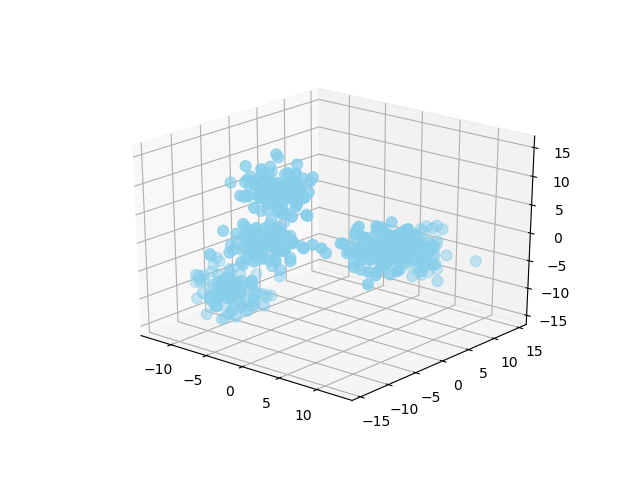

In [16]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['column1'], df['column2'], df['column3'], c='skyblue', s=60)

# Clustering

First try with 5 Clusters

In [6]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>


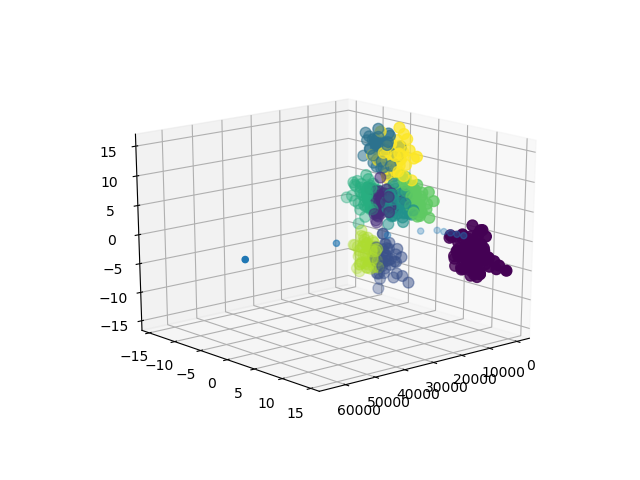

In [17]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['column1'], df['column2'], df['column3'], c=model.labels_, s=60)

# Trying to optimize the number of cluster

In real life, the number of clusters isn't know.

In [8]:
sse = []

for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit(X)
    sse.append(model.inertia_)

<IPython.core.display.Javascript object>


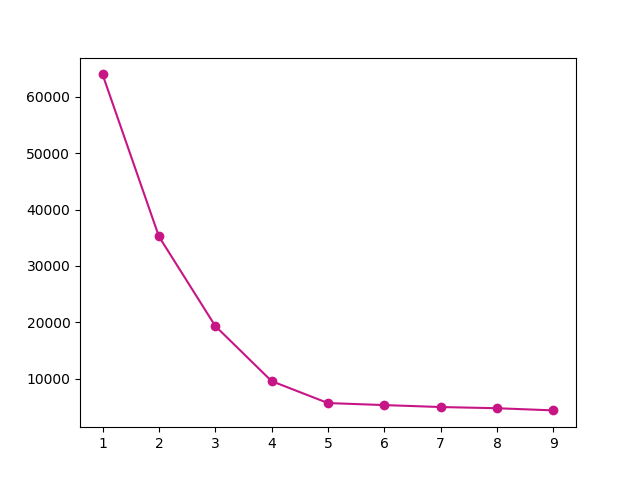

In [21]:
fig = plt.figure()
plt.plot(range(1,10), sse, marker='o', color='mediumvioletred')
plt.show()